In [67]:
# Necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [35]:
# Load the data
Land_Data = pd.read_csv("C:/Users/rfull/OneDrive/Documents/Summer Research Project/Landscaping_Data.csv")

In [37]:
# Remove the columns of data which are non numeric
Land_Data = Land_Data.drop(Land_Data.columns[[20]], axis = 1)
Land_Data.head()

,Date,Plant_Type,Plant_Size,Low,High,Temp_Diff,Rain,Growth,Pruned,Quadrant,Shade,UV,Humidity,Dew_Point,Pressure,Wind_Gust,Cloud_Cover,Visibility,AQI,Pollen
0,5/10/2025,Flowering,Large,49,73,24,0.0,0.6,Yes,2,Dark,8,0.34,47,30.34,7,0.09,9.7,51,43
1,5/10/2025,Nonflowering,Medium,49,73,24,0.0,0.0,Yes,3,Neutral,8,0.34,47,30.34,7,0.09,9.7,51,43
2,5/10/2025,Nonflowering,Small,49,73,24,0.0,0.0,Yes,3,Neutral,8,0.34,47,30.34,7,0.09,9.7,51,43
3,5/10/2025,Nonflowering,Medium,49,73,24,0.0,0.0,Yes,3,Bright,8,0.34,47,30.34,7,0.09,9.7,51,43
4,5/10/2025,Nonflowering,Medium,49,73,24,0.0,0.3,Yes,3,Bright,8,0.34,47,30.34,7,0.09,9.7,51,43


In [41]:
# Change string values into numeric values

# Plant type conversion
d = {'Flowering':0, 'Nonflowering':1, 'Tree':2}
Land_Data['Plant_Type'] = Land_Data['Plant_Type'].map(d)

# Plant size conversion
d = {'Large':0, 'Medium':1, 'Small':2}
Land_Data['Plant_Size'] = Land_Data['Plant_Size'].map(d)

# Pruned conversion
d = {'No':0, 'Yes':1}
Land_Data['Pruned'] = Land_Data['Pruned'].map(d)

# Shade conversion
d = {'Dark':0, 'Neutral':1, 'Bright':2}
Land_Data['Shade'] = Land_Data['Shade'].map(d)

[Text(0.3821428571428571, 0.9583333333333334, 'Humidity <= 0.345\ngini = 0.317\nsamples = 637\nvalue = [511, 126]'),
 Text(0.3535714285714286, 0.875, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.3678571428571429, 0.9166666666666667, 'True  '),
 Text(0.4107142857142857, 0.875, 'Humidity <= 0.855\ngini = 0.306\nsamples = 630\nvalue = [511, 119]'),
 Text(0.3964285714285714, 0.9166666666666667, '  False'),
 Text(0.3821428571428571, 0.7916666666666666, 'Temp_Diff <= 12.5\ngini = 0.341\nsamples = 546\nvalue = [427, 119]'),
 Text(0.11428571428571428, 0.7083333333333334, 'Humidity <= 0.655\ngini = 0.496\nsamples = 77\nvalue = [42, 35]'),
 Text(0.08571428571428572, 0.625, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.14285714285714285, 0.625, 'Temp_Diff <= 11.5\ngini = 0.444\nsamples = 63\nvalue = [42, 21]'),
 Text(0.08571428571428572, 0.5416666666666666, 'Rain <= 0.37\ngini = 0.278\nsamples = 42\nvalue = [35, 7]'),
 Text(0.05714285714285714, 0.4583333333333333, 'Humidity <= 0.78

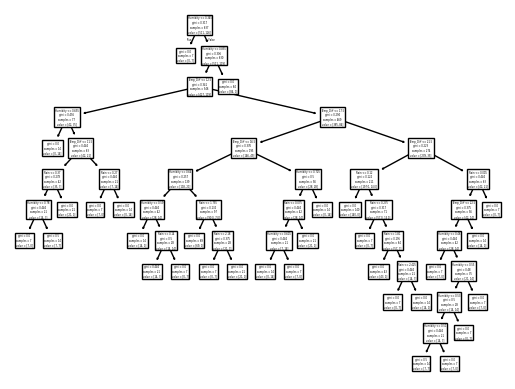

In [53]:
# Create the decision tree

# Seperate features and target
# X = Land_Data.drop(Land_Data.columns[[0,7]],axis=1) #Removing date and target for features
Features = ['Rain', 'Humidity', 'Temp_Diff']
X = Land_Data[Features]
y = Land_Data['Pruned']

# Create the tree itself
Growtree = DecisionTreeClassifier()
Growtree = Growtree.fit(X, y)

# Plot the tree
tree.plot_tree(Growtree, feature_names = Features)

Mean Squared Error: 0.7090499132037327


[Text(0.8101546348936799, 0.9736842105263158, 'x[5] <= 3.375\nsquared_error = 2.114\nsamples = 509\nvalue = 0.744'),
 Text(0.6791175981984643, 0.9210526315789473, 'x[5] <= 0.775\nsquared_error = 0.454\nsamples = 476\nvalue = 0.461'),
 Text(0.7446361165460721, 0.9473684210526316, 'True  '),
 Text(0.5004614589486119, 0.868421052631579, 'x[0] <= 1.5\nsquared_error = 0.156\nsamples = 370\nvalue = 0.262'),
 Text(0.3521116361488482, 0.8157894736842105, 'x[5] <= 0.005\nsquared_error = 0.037\nsamples = 322\nvalue = 0.183'),
 Text(0.2574018015357354, 0.7631578947368421, 'x[4] <= 23.5\nsquared_error = 0.025\nsamples = 188\nvalue = 0.118'),
 Text(0.21592587123449497, 0.7105263157894737, 'x[7] <= 3.5\nsquared_error = 0.019\nsamples = 178\nvalue = 0.106'),
 Text(0.16368871825162434, 0.6578947368421053, 'x[14] <= 0.645\nsquared_error = 0.014\nsamples = 147\nvalue = 0.082'),
 Text(0.09465445953927938, 0.6052631578947368, 'x[17] <= 8.0\nsquared_error = 0.011\nsamples = 138\nvalue = 0.072'),
 Text(0.04

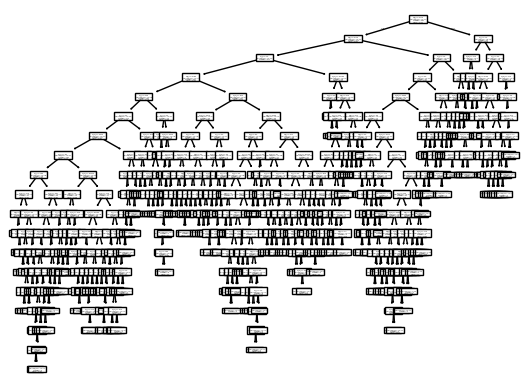

In [69]:
# Features: all columns except Growth
X = Land_Data.drop(Land_Data.columns[[0,7]], axis = 1)

# Target variable
y = Land_Data['Growth']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize model
model = DecisionTreeRegressor(random_state=42)

# Train model
model.fit(X_train, y_train)

# Predict on test
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plot the tree
tree.plot_tree(model)

Mean Squared Error: 0.8754965308582543


[Text(0.769413499344692, 0.9666666666666667, 'x[2] <= 3.375\nsquared_error = 2.114\nsamples = 509\nvalue = 0.744'),
 Text(0.5689711664482306, 0.9, 'x[2] <= 0.775\nsquared_error = 0.454\nsamples = 476\nvalue = 0.461'),
 Text(0.6691923328964613, 0.9333333333333333, 'True  '),
 Text(0.33674639580602883, 0.8333333333333334, 'x[0] <= 1.5\nsquared_error = 0.156\nsamples = 370\nvalue = 0.262'),
 Text(0.12434469200524247, 0.7666666666666667, 'x[2] <= 0.005\nsquared_error = 0.037\nsamples = 322\nvalue = 0.183'),
 Text(0.035386631716906945, 0.7, 'x[1] <= 0.5\nsquared_error = 0.025\nsamples = 188\nvalue = 0.118'),
 Text(0.02490170380078637, 0.6333333333333333, 'x[0] <= 0.5\nsquared_error = 0.037\nsamples = 65\nvalue = 0.156'),
 Text(0.019659239842726082, 0.5666666666666667, 'squared_error = 0.038\nsamples = 32\nvalue = 0.094'),
 Text(0.03014416775884666, 0.5666666666666667, 'squared_error = 0.029\nsamples = 33\nvalue = 0.217'),
 Text(0.045871559633027525, 0.6333333333333333, 'x[1] <= 1.5\nsquared

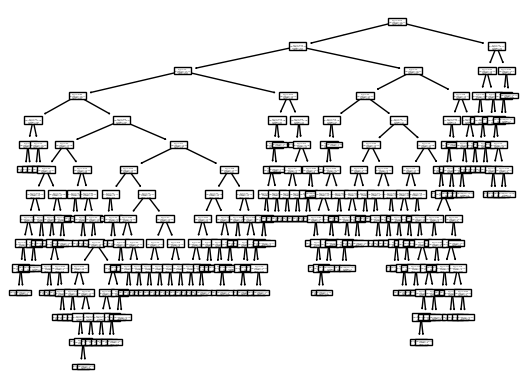

In [95]:
# Features: all columns except Growth
X = Land_Data.drop(Land_Data.columns[[0,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19]], axis = 1)

# Target variable
y = Land_Data['Growth']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize model
model = DecisionTreeRegressor(random_state=42)

# Train model
model.fit(X_train, y_train)

# Predict on test
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plot the tree
tree.plot_tree(model)